# Exploratory Data Analysis

Notes à moi-même :
- Essayer de normaliser les données pour voir ce que ça donne
- Détecter les outliers et reprendre les études pour voir ce que ça donne (ex : "...more" pour les genres, les prix trop élevés, les livres avec très peu de notes, ...)

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wordcloud as wc

## Preprocessing

In [65]:
df = pd.read_csv("./../../data/goodreads_data.csv", converters={"genres": lambda x: x[1:-1].split(",")})
df.head(5)

,title,author,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,publication_info,literary_awards,original_title,series,characters,format,published,isbn,language,setting
0,The Weed That Strings the Hangman's Bag,Alan Bradley,4.99,From Dagger Award-winning and internationally ...,Librarian Note: There is more than one author ...,"['Mystery', 'Fiction', 'Historical Fiction',...",55692.0,5756.0,"[395.0, 1540.0, 12237.0, 25714.0, 15806.0]","364 pages, Hardcover","First published March 9, 2010",['Goodreads Choice Award Nominee for Mystery &...,The Weed That Strings the Hangman's Bag,['Flavia de Luce '],"['Flavia de Luce', 'Ophelia de Luce', 'Daphne ...","364 pages, Hardcover","March 9, 2010 by Delacorte Press",9780385342315 (ISBN10: 0385342314),English,NaN
1,A Good Man in Africa,William Boyd,11.99,"In the small African republic of Kinjanja, Bri...","Note: William^^BoydOf Scottish descent, Boyd w...","['Fiction', 'Africa', 'Humor', 'Novels', '...",5018.0,298.0,"[90.0, 257.0, 1222.0, 2184.0, 1265.0]","352 pages, Paperback","First published January 1, 1981","['Whitbread Award for First Novel (1981)', 'So...",A Good Man in Africa,NaN,['Morgan Leafy'],"352 pages, Paperback","January 14, 2003 by Vintage",9781400030026 (ISBN10: 1400030021),English,['Kinjanja']
2,It Had to Be You,Janice Thompson,0.00,Bella couldn't be happier that her long-feudin...,"Welcome to the wacky, wonderful world of inspi...","['Christian Fiction', 'Romance', 'Christian'...",2152.0,132.0,"[14.0, 86.0, 421.0, 735.0, 896.0]","336 pages, Paperback","First published January 1, 2010",NaN,NaN,"['Weddings by Bella', 'Galveston Weddings']",NaN,"336 pages, Paperback","May 1, 2010 by Revell",9780800733445 (ISBN10: 0800733444),English,"['Galveston, Texas']"
3,Missing,Kelley Armstrong,6.99,Everyone knows they left. No one knows they're...,Kelley Armstrong has been telling stories sinc...,"['Young Adult', 'Mystery', 'Thriller', 'Fic...",3393.0,491.0,"[54.0, 185.0, 799.0, 1308.0, 1047.0]","515 pages, ebook","First published April 18, 2017",NaN,Reeve's End (working title only),NaN,"['Edie Greene', 'Winter Crane', 'Tanner Robson...","515 pages, ebook","April 18, 2017 by Crown Books for Young Readers",9780399550348 (ISBN10: 0399550348),English,NaN
4,Dawn of Rebellion,Michelle Lynn,0.00,"My name is Dawn Nolan, and I've grown up on th...",Michelle moved around the Midwest most of her ...,"['Young Adult', 'Dystopia', 'Romance', 'Sci...",142.0,76.0,"[1.0, 6.0, 23.0, 41.0, 71.0]","321 pages, Paperback","First published January 1, 2013",NaN,Dawn of Rebellion,['Dawn of Rebellion'],NaN,"321 pages, Paperback","October 17, 2013 by CreateSpace Independent Pu...",9781492942429 (ISBN10: 1492942421),English,NaN


In [66]:
print("Number of books (with duplicates) : ", len(df))
df.drop_duplicates(subset=["title", "author"], keep='first', inplace=True, ignore_index=True)
print("Number of books (without duplicates) : ", len(df))

Number of books (with duplicates) :  24630
Number of books (without duplicates) :  19666


## Author Analysis

In [67]:
authors_groups = df.groupby("author")

In [68]:
authors_number_of_books = authors_groups.count().sort_values(by="title", ascending=False)
authors_number_of_books.head(5)

,title,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,publication_info,literary_awards,original_title,series,characters,format,published,isbn,language,setting
author,,,,,,,,,,,,,,,,,,,
Neil Gaiman,48,48,48,0,48,48,48,48,48,48,23,39,27,30,48,48,38,48,12
Stephen King,36,36,36,36,36,36,36,36,36,36,24,36,6,25,36,36,25,36,23
R.L. Stine,34,34,34,34,34,34,34,34,34,34,0,33,34,23,34,34,34,34,3
Nora Roberts,32,32,32,32,32,32,32,32,32,32,13,32,25,31,32,32,28,32,31
J.D. Robb,26,26,26,26,26,26,26,26,26,26,13,25,26,25,26,26,25,25,17


In [69]:
authors_number_of_books.describe()

,title,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,publication_info,literary_awards,original_title,series,characters,format,published,isbn,language,setting
count,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000,12061.000000
mean,1.630545,1.630545,1.630379,1.445237,1.630545,1.630545,1.630545,1.630545,1.630545,1.630545,0.447475,1.292264,0.877788,0.519443,1.630545,1.622751,1.352541,1.600945,0.477987
std,1.792645,1.792645,1.792610,1.827627,1.792645,1.792645,1.792645,1.792645,1.792645,1.792645,0.921908,1.727947,1.686348,1.428584,1.792645,1.791252,1.644454,1.786451,1.180459
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
max,48.000000,48.000000,48.000000,36.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,24.000000,39.000000,34.000000,31.000000,48.000000,48.000000,38.000000,48.000000,31.000000


<Axes: xlabel='title', ylabel='Count'>

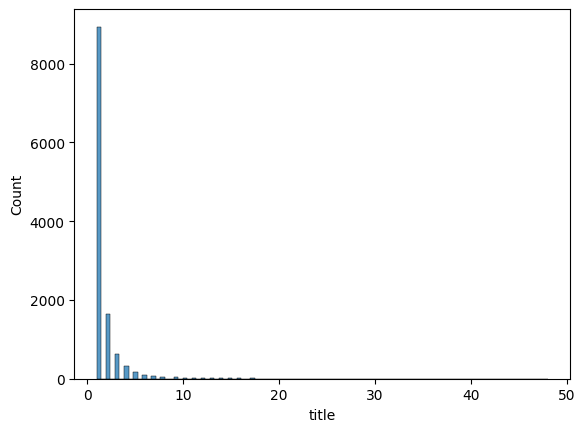

In [70]:
# Number of authors having published x books among those in our dataset
sns.histplot(authors_number_of_books, x="title", bins=100)

Dans notre dataset, la plupart des auteurs n'ont écrit qu'un seul livre, l'auteur le plus prolifique ayant publié près de 48 livres (probablement un outlier, car on peut s'attendre à ce que 75% de la population ait écrit moins de deux livres). Par ailleurs, cela impacte également la moyenne : on s'attend à ce qu'un auteur ait écrit entre un et deux livres.

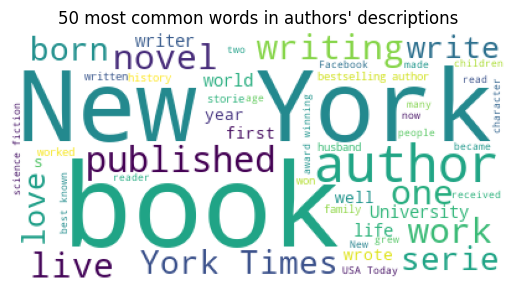

In [71]:
authors_descriptions = " ".join(df["author_description"].dropna())
wordcloud = wc.WordCloud(background_color="white", max_words=50).generate(authors_descriptions)
plt.imshow(wordcloud)
plt.title("50 most common words in authors' descriptions")
plt.axis("off")
plt.show()

## Genre Analysis

In [88]:
df_genres = df.explode("genres")
df_genres["genres"].astype("category")
genres_groups = df_genres.groupby("genres")
genres_number_of_books = genres_groups.count().sort_values(by="title", ascending=False)
genres_number_of_books.head(5)

,title,author,price,description,author_description,n_ratings,n_reviews,ratings,pages_format,publication_info,literary_awards,original_title,series,characters,format,published,isbn,language,setting,average_rating
genres,,,,,,,,,,,,,,,,,,,,
'...more',16516,16516,16516,16515,15064,16516,16516,16516,16516,16516,5137,13768,8852,6092,16516,16461,14047,16256,5510,16516
'Fiction',8449,8449,8449,8448,7852,8449,8449,8449,8449,8449,2761,6953,5737,3551,8449,8416,7298,8341,3172,8449
'Romance',4261,4261,4261,4260,3977,4261,4261,4261,4261,4261,965,2996,3275,1772,4261,4238,3293,4186,1581,4261
'Contemporary',3728,3728,3728,3728,3476,3728,3728,3728,3728,3728,985,2524,2425,1311,3728,3721,2592,3627,1475,3728
'Nonfiction',3465,3465,3465,3465,2715,3465,3465,3465,3465,3465,847,3188,365,565,3465,3449,3272,3400,426,3465


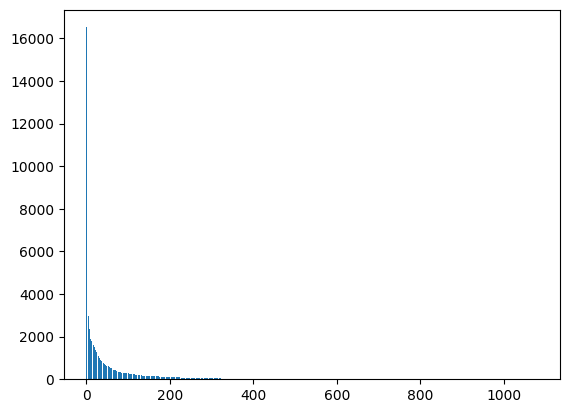

In [115]:
genres_list = np.unique(df_genres["genres"])

genres_dict = {genre: i for i, genre in enumerate(genres_list)}
genres_counts = df_genres["genres"].value_counts()

plt.bar(x=np.arange(len(genres_list)), height=genres_counts, align="center")
plt.show()

## Price Analysis

In [77]:
prices = df["price"].dropna()
prices.describe()

count    19666.000000
mean         7.719634
std          6.527542
min          0.000000
25%          2.990000
50%          7.990000
75%         11.577500
max        199.730000
Name: price, dtype: float64

<Axes: ylabel='price'>

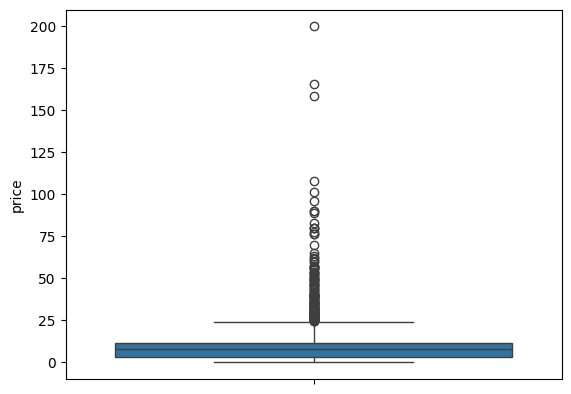

In [79]:
sns.boxplot(data=prices)

## Rating Analysis

In [73]:
df["average_rating"] = df["ratings"].apply(lambda x: sum([(i+1) * float(x[1:-1].split(",")[i]) for i in range(5)])) / df["n_ratings"]
df.head(5)

,title,author,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,...,literary_awards,original_title,series,characters,format,published,isbn,language,setting,average_rating
0,The Weed That Strings the Hangman's Bag,Alan Bradley,4.99,From Dagger Award-winning and internationally ...,Librarian Note: There is more than one author ...,"['Mystery', 'Fiction', 'Historical Fiction',...",55692.0,5756.0,"[395.0, 1540.0, 12237.0, 25714.0, 15806.0]","364 pages, Hardcover",...,['Goodreads Choice Award Nominee for Mystery &...,The Weed That Strings the Hangman's Bag,['Flavia de Luce '],"['Flavia de Luce', 'Ophelia de Luce', 'Daphne ...","364 pages, Hardcover","March 9, 2010 by Delacorte Press",9780385342315 (ISBN10: 0385342314),English,NaN,3.987503
1,A Good Man in Africa,William Boyd,11.99,"In the small African republic of Kinjanja, Bri...","Note: William^^BoydOf Scottish descent, Boyd w...","['Fiction', 'Africa', 'Humor', 'Novels', '...",5018.0,298.0,"[90.0, 257.0, 1222.0, 2184.0, 1265.0]","352 pages, Paperback",...,"['Whitbread Award for First Novel (1981)', 'So...",A Good Man in Africa,NaN,['Morgan Leafy'],"352 pages, Paperback","January 14, 2003 by Vintage",9781400030026 (ISBN10: 1400030021),English,['Kinjanja'],3.852332
2,It Had to Be You,Janice Thompson,0.00,Bella couldn't be happier that her long-feudin...,"Welcome to the wacky, wonderful world of inspi...","['Christian Fiction', 'Romance', 'Christian'...",2152.0,132.0,"[14.0, 86.0, 421.0, 735.0, 896.0]","336 pages, Paperback",...,NaN,NaN,"['Weddings by Bella', 'Galveston Weddings']",NaN,"336 pages, Paperback","May 1, 2010 by Revell",9780800733445 (ISBN10: 0800733444),English,"['Galveston, Texas']",4.121283
3,Missing,Kelley Armstrong,6.99,Everyone knows they left. No one knows they're...,Kelley Armstrong has been telling stories sinc...,"['Young Adult', 'Mystery', 'Thriller', 'Fic...",3393.0,491.0,"[54.0, 185.0, 799.0, 1308.0, 1047.0]","515 pages, ebook",...,NaN,Reeve's End (working title only),NaN,"['Edie Greene', 'Winter Crane', 'Tanner Robson...","515 pages, ebook","April 18, 2017 by Crown Books for Young Readers",9780399550348 (ISBN10: 0399550348),English,NaN,3.916298
4,Dawn of Rebellion,Michelle Lynn,0.00,"My name is Dawn Nolan, and I've grown up on th...",Michelle moved around the Midwest most of her ...,"['Young Adult', 'Dystopia', 'Romance', 'Sci...",142.0,76.0,"[1.0, 6.0, 23.0, 41.0, 71.0]","321 pages, Paperback",...,NaN,Dawn of Rebellion,['Dawn of Rebellion'],NaN,"321 pages, Paperback","October 17, 2013 by CreateSpace Independent Pu...",9781492942429 (ISBN10: 1492942421),English,NaN,4.232394


<Axes: ylabel='average_rating'>

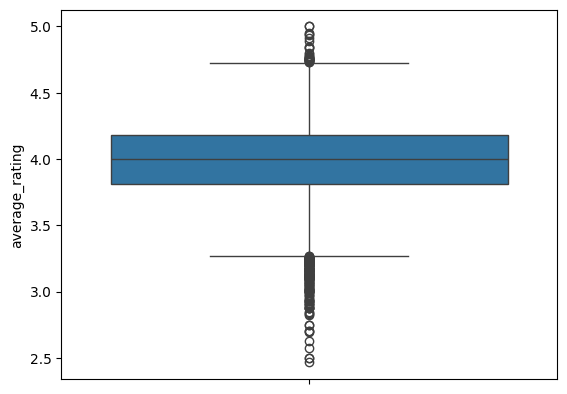

In [74]:
sns.boxplot(data=df["average_rating"])

De ce graphique, on peut déduire :
- Soit la distribution est biaisée, et les livres scrapés sont majoritairement des livres avec de très bonnes notes
- Soit les notes données par les utilisateurs sont généralement élevées
- Soit une majorité d'ouvrages sont bons

In [75]:
authors_average_rating = df[["author", "average_rating", "n_ratings"]].groupby("author").mean().sort_values(by="average_rating", ascending=False)
authors_average_rating.head(5)

,average_rating,n_ratings
author,,
Phillip B. Chute,5.000000,3.0
J. David Clarke,5.000000,2.0
Elias Zapple,4.946429,56.0
A. Razor,4.944444,18.0
Isabel Ibañez,4.909091,22.0


<Axes: xlabel='log_n_ratings', ylabel='average_rating'>

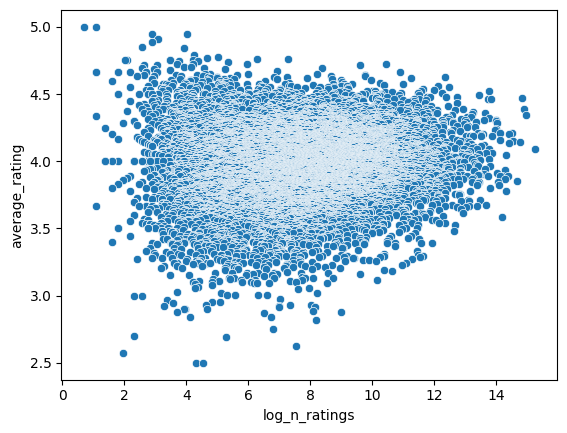

In [76]:
authors_average_rating["log_n_ratings"] = np.log(authors_average_rating["n_ratings"])
sns.scatterplot(authors_average_rating, x="log_n_ratings", y="average_rating")